In [2]:
import numpy as np
import pandas as pd

import scanpy as sc
from collections import Counter
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score,silhouette_samples, r2_score

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
import networkx as nx

In [4]:
df_assess = pd.DataFrame(np.zeros((0,6)))
df_assess.columns = ["GC","ASW_B","ARI","NMI","ASW_MC","ASW_SC"]

# BBKNN

In [2]:
adata = sc.read_h5ad('/data1/chenyx/processed.bbknn.h5ad')

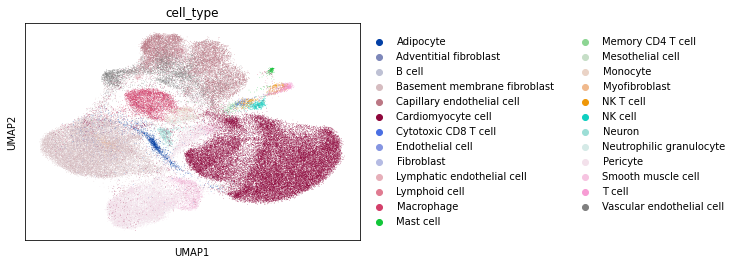

In [5]:
sc.pl.embedding(adata, basis='umap', color="cell_type")

In [100]:
le = LabelEncoder()
label_batch =le.fit_transform(adata.obs["Ref"])

In [237]:
# ARI & NMI
ARI_list = []
NMI_list = []
for reso in [0.1*x for  x in range(1,21)]:
    sc.tl.leiden(adata,resolution=reso)
    ARI_list.append(adjusted_rand_score(adata.obs["cell_type"],adata.obs["leiden"]))
    NMI_list.append(normalized_mutual_info_score(adata.obs["cell_type"],adata.obs["leiden"]))

In [74]:
# ASW_C
ASW_SC = (silhouette_score(adata.obsm["X_pca"],adata.obs["cell_type"])+1)/2
ASW_MC = (silhouette_score(adata.obsm["X_pca"],adata.obs["MCT"])+1)/2

# ASW_B
ASW_B = 0
ct_list = pd.unique(adata.obs["cell_type"])
ss_list = silhouette_samples(adata.obsm["X_pca"], adata.obs["Ref"])

for i in range(len(pd.unique(adata.obs["cell_type"]))):
    ct = ct_list[i]
    C = sum(adata.obs["cell_type"]== ct)
    ASW_B = ASW_B + sum(1-abs(ss_list[adata.obs["cell_type"]== ct]))/C
    
ASW_B = ASW_B/len(ct_list)

In [220]:
# GC 
GC = 0
connectivity_graph =  pd.DataFrame(adata.obsp["connectivities"].todense())
for ct in ct_list:
    sub_graph = connectivity_graph.loc[adata.obs["cell_type"].values== ct,adata.obs["cell_type"].values== ct]

    G = nx.Graph()
    G.add_nodes_from(sub_graph.index.tolist())

    x_list = sub_graph.index.values[np.where(sub_graph>0)[0]]
    y_list = sub_graph.index.values[np.where(sub_graph>0)[1]]
    value_list = sub_graph.values[sub_graph.values>0]

    G.add_weighted_edges_from([(x_list[i],y_list[i],value_list[i]) for i in range(len(value_list))])
    LCC = len(sorted(nx.connected_components(G))[0])
    
    GC += LCC/sub_graph.shape[0]
GC = GC/len(ct_list)

In [240]:
df_assess.loc["BBKNN",:] = [GC, ASW_B, max(ARI_list), max(NMI_list), ASW_MC, ASW_SC]

# Combat

In [242]:
adata = sc.read_h5ad('/data1/chenyx/processed.combat.h5ad')

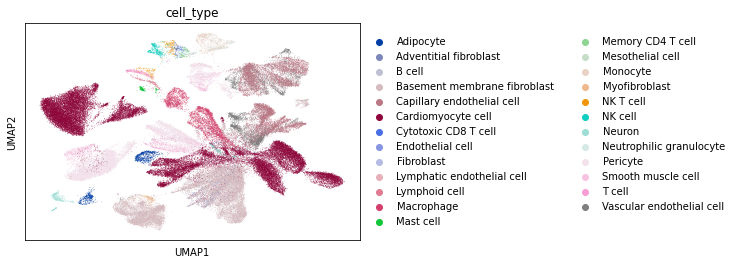

In [243]:
sc.pl.embedding(adata, basis='umap', color="cell_type")

In [244]:
le = LabelEncoder()
label_batch =le.fit_transform(adata.obs["Ref"])

In [245]:
# ARI & NMI
ARI_list = []
NMI_list = []
for reso in [0.1*x for  x in range(1,21)]:
    sc.tl.leiden(adata,resolution=reso)
    ARI_list.append(adjusted_rand_score(adata.obs["cell_type"],adata.obs["leiden"]))
    NMI_list.append(normalized_mutual_info_score(adata.obs["cell_type"],adata.obs["leiden"]))

In [246]:
# ASW_C
ASW_SC = (silhouette_score(adata.obsm["X_pca"],adata.obs["cell_type"])+1)/2
ASW_MC = (silhouette_score(adata.obsm["X_pca"],adata.obs["MCT"])+1)/2

# ASW_B
ASW_B = 0
ct_list = pd.unique(adata.obs["cell_type"])
ss_list = silhouette_samples(adata.obsm["X_pca"], adata.obs["Ref"])

for i in range(len(pd.unique(adata.obs["cell_type"]))):
    ct = ct_list[i]
    C = sum(adata.obs["cell_type"]== ct)
    ASW_B = ASW_B + sum(1-abs(ss_list[adata.obs["cell_type"]== ct]))/C
    
ASW_B = ASW_B/len(ct_list)

In [248]:
# GC 
GC = 0
connectivity_graph =  pd.DataFrame(adata.obsp["connectivities"].todense())
for ct in ct_list:
    sub_graph = connectivity_graph.loc[adata.obs["cell_type"].values== ct,adata.obs["cell_type"].values== ct]

    G = nx.Graph()
    G.add_nodes_from(sub_graph.index.tolist())

    x_list = sub_graph.index.values[np.where(sub_graph>0)[0]]
    y_list = sub_graph.index.values[np.where(sub_graph>0)[1]]
    value_list = sub_graph.values[sub_graph.values>0]

    G.add_weighted_edges_from([(x_list[i],y_list[i],value_list[i]) for i in range(len(value_list))])
    LCC = len(sorted(nx.connected_components(G))[0])
    
    GC += LCC/sub_graph.shape[0]
GC = GC/len(ct_list)

In [249]:
df_assess.loc["combat",:] = [GC, ASW_B, max(ARI_list), max(NMI_list), ASW_MC, ASW_SC]

# SAUCIE

In [252]:
adata = sc.read_h5ad('/data1/chenyx/processed.saucie.h5ad')

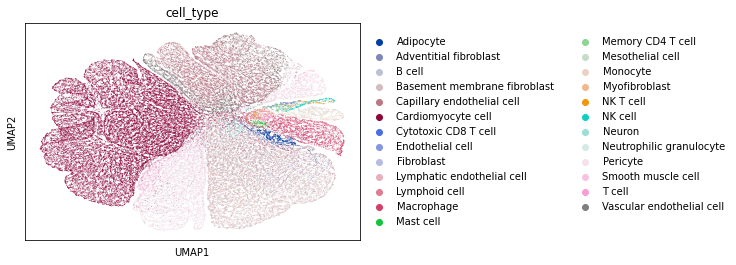

In [253]:
sc.pl.embedding(adata, basis='umap', color="cell_type")

In [254]:
le = LabelEncoder()
label_batch =le.fit_transform(adata.obs["Ref"])

In [255]:
# ARI & NMI
ARI_list = []
NMI_list = []
for reso in [0.1*x for  x in range(1,21)]:
    sc.tl.leiden(adata,resolution=reso)
    ARI_list.append(adjusted_rand_score(adata.obs["cell_type"],adata.obs["leiden"]))
    NMI_list.append(normalized_mutual_info_score(adata.obs["cell_type"],adata.obs["leiden"]))

In [256]:
# ASW_C
ASW_SC = (silhouette_score(adata.obsm["X_pca"],adata.obs["cell_type"])+1)/2
ASW_MC = (silhouette_score(adata.obsm["X_pca"],adata.obs["MCT"])+1)/2

# ASW_B
ASW_B = 0
ct_list = pd.unique(adata.obs["cell_type"])
ss_list = silhouette_samples(adata.obsm["X_pca"], adata.obs["Ref"])

for i in range(len(pd.unique(adata.obs["cell_type"]))):
    ct = ct_list[i]
    C = sum(adata.obs["cell_type"]== ct)
    ASW_B = ASW_B + sum(1-abs(ss_list[adata.obs["cell_type"]== ct]))/C
    
ASW_B = ASW_B/len(ct_list)

In [258]:
# GC 
GC = 0
connectivity_graph =  pd.DataFrame(adata.obsp["connectivities"].todense())
for ct in ct_list:
    sub_graph = connectivity_graph.loc[adata.obs["cell_type"].values== ct,adata.obs["cell_type"].values== ct]

    G = nx.Graph()
    G.add_nodes_from(sub_graph.index.tolist())

    x_list = sub_graph.index.values[np.where(sub_graph>0)[0]]
    y_list = sub_graph.index.values[np.where(sub_graph>0)[1]]
    value_list = sub_graph.values[sub_graph.values>0]

    G.add_weighted_edges_from([(x_list[i],y_list[i],value_list[i]) for i in range(len(value_list))])
    LCC = len(sorted(nx.connected_components(G))[0])
    
    GC += LCC/sub_graph.shape[0]
GC = GC/len(ct_list)

In [259]:
df_assess.loc["saucie",:] = [GC, ASW_B, max(ARI_list), max(NMI_list), ASW_MC, ASW_SC]

# scanorama

In [261]:
adata = sc.read_h5ad('/data1/chenyx/processed.scanorama.h5ad')

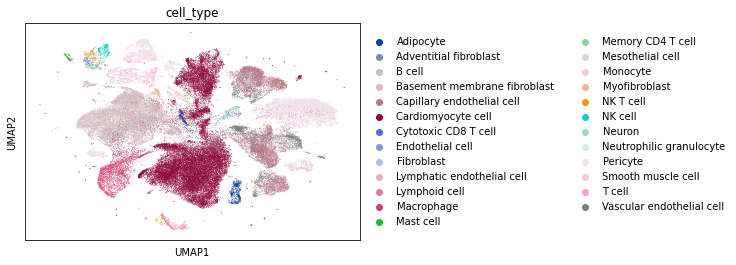

In [262]:
sc.pl.embedding(adata, basis='umap', color="cell_type")

In [263]:
le = LabelEncoder()
label_batch =le.fit_transform(adata.obs["Ref"])

In [264]:
# ARI & NMI
ARI_list = []
NMI_list = []
for reso in [0.1*x for  x in range(1,21)]:
    sc.tl.leiden(adata,resolution=reso)
    ARI_list.append(adjusted_rand_score(adata.obs["cell_type"],adata.obs["leiden"]))
    NMI_list.append(normalized_mutual_info_score(adata.obs["cell_type"],adata.obs["leiden"]))

In [265]:
# ASW_C
ASW_SC = (silhouette_score(adata.obsm["X_pca"],adata.obs["cell_type"])+1)/2
ASW_MC = (silhouette_score(adata.obsm["X_pca"],adata.obs["MCT"])+1)/2

# ASW_B
ASW_B = 0
ct_list = pd.unique(adata.obs["cell_type"])
ss_list = silhouette_samples(adata.obsm["X_pca"], adata.obs["Ref"])

for i in range(len(pd.unique(adata.obs["cell_type"]))):
    ct = ct_list[i]
    C = sum(adata.obs["cell_type"]== ct)
    ASW_B = ASW_B + sum(1-abs(ss_list[adata.obs["cell_type"]== ct]))/C
    
ASW_B = ASW_B/len(ct_list)

In [267]:
# GC 
GC = 0
connectivity_graph =  pd.DataFrame(adata.obsp["connectivities"].todense())
for ct in ct_list:
    sub_graph = connectivity_graph.loc[adata.obs["cell_type"].values== ct,adata.obs["cell_type"].values== ct]

    G = nx.Graph()
    G.add_nodes_from(sub_graph.index.tolist())

    x_list = sub_graph.index.values[np.where(sub_graph>0)[0]]
    y_list = sub_graph.index.values[np.where(sub_graph>0)[1]]
    value_list = sub_graph.values[sub_graph.values>0]

    G.add_weighted_edges_from([(x_list[i],y_list[i],value_list[i]) for i in range(len(value_list))])
    LCC = len(sorted(nx.connected_components(G))[0])
    
    GC += LCC/sub_graph.shape[0]
GC = GC/len(ct_list)

In [268]:
df_assess.loc["scanorama",:] = [GC, ASW_B, max(ARI_list), max(NMI_list), ASW_MC, ASW_SC]

# scVI

In [271]:
adata = sc.read_h5ad('/data1/chenyx/processed.scVI.h5ad')

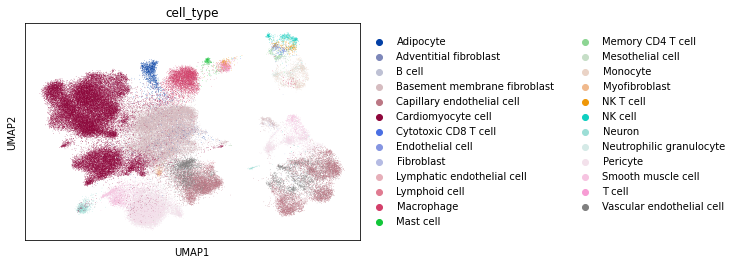

In [272]:
sc.pl.embedding(adata, basis='umap', color="cell_type")

In [273]:
le = LabelEncoder()
label_batch =le.fit_transform(adata.obs["Ref"])

In [274]:
# ARI & NMI
ARI_list = []
NMI_list = []
for reso in [0.1*x for  x in range(1,21)]:
    sc.tl.leiden(adata,resolution=reso)
    ARI_list.append(adjusted_rand_score(adata.obs["cell_type"],adata.obs["leiden"]))
    NMI_list.append(normalized_mutual_info_score(adata.obs["cell_type"],adata.obs["leiden"]))

In [275]:
# ASW_C
ASW_SC = (silhouette_score(adata.obsm["X_pca"],adata.obs["cell_type"])+1)/2
ASW_MC = (silhouette_score(adata.obsm["X_pca"],adata.obs["MCT"])+1)/2

# ASW_B
ASW_B = 0
ct_list = pd.unique(adata.obs["cell_type"])
ss_list = silhouette_samples(adata.obsm["X_pca"], adata.obs["Ref"])

for i in range(len(pd.unique(adata.obs["cell_type"]))):
    ct = ct_list[i]
    C = sum(adata.obs["cell_type"]== ct)
    ASW_B = ASW_B + sum(1-abs(ss_list[adata.obs["cell_type"]== ct]))/C
    
ASW_B = ASW_B/len(ct_list)

In [277]:
# GC 
GC = 0
connectivity_graph =  pd.DataFrame(adata.obsp["connectivities"].todense())
for ct in ct_list:
    sub_graph = connectivity_graph.loc[adata.obs["cell_type"].values== ct,adata.obs["cell_type"].values== ct]

    G = nx.Graph()
    G.add_nodes_from(sub_graph.index.tolist())

    x_list = sub_graph.index.values[np.where(sub_graph>0)[0]]
    y_list = sub_graph.index.values[np.where(sub_graph>0)[1]]
    value_list = sub_graph.values[sub_graph.values>0]

    G.add_weighted_edges_from([(x_list[i],y_list[i],value_list[i]) for i in range(len(value_list))])
    LCC = len(sorted(nx.connected_components(G))[0])
    
    GC += LCC/sub_graph.shape[0]
GC = GC/len(ct_list)

In [278]:
df_assess.loc["scVI",:] = [GC, ASW_B, max(ARI_list), max(NMI_list), ASW_MC, ASW_SC]

# scgen

In [279]:
adata = sc.read_h5ad('/data1/chenyx/processed.scgen.h5ad')

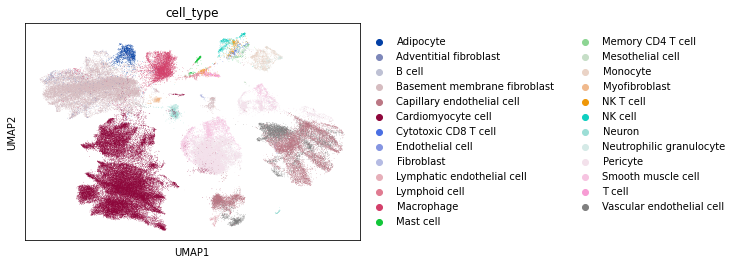

In [280]:
sc.pl.embedding(adata, basis='umap', color="cell_type")

In [281]:
le = LabelEncoder()
label_batch =le.fit_transform(adata.obs["Ref"])

In [282]:
# ARI & NMI
ARI_list = []
NMI_list = []
for reso in [0.1*x for  x in range(1,21)]:
    sc.tl.leiden(adata,resolution=reso)
    ARI_list.append(adjusted_rand_score(adata.obs["cell_type"],adata.obs["leiden"]))
    NMI_list.append(normalized_mutual_info_score(adata.obs["cell_type"],adata.obs["leiden"]))

In [290]:
# ASW_C
ASW_SC = (silhouette_score(adata.obsm["corrected_latent"],adata.obs["cell_type"])+1)/2
ASW_MC = (silhouette_score(adata.obsm["corrected_latent"],adata.obs["MCT"])+1)/2

# ASW_B
ASW_B = 0
ct_list = pd.unique(adata.obs["cell_type"])
ss_list = silhouette_samples(adata.obsm["corrected_latent"], adata.obs["Ref"])

for i in range(len(pd.unique(adata.obs["cell_type"]))):
    ct = ct_list[i]
    C = sum(adata.obs["cell_type"]== ct)
    ASW_B = ASW_B + sum(1-abs(ss_list[adata.obs["cell_type"]== ct]))/C
    
ASW_B = ASW_B/len(ct_list)

In [292]:
# GC 
GC = 0
connectivity_graph =  pd.DataFrame(adata.obsp["connectivities"].todense())
for ct in ct_list:
    sub_graph = connectivity_graph.loc[adata.obs["cell_type"].values== ct,adata.obs["cell_type"].values== ct]

    G = nx.Graph()
    G.add_nodes_from(sub_graph.index.tolist())

    x_list = sub_graph.index.values[np.where(sub_graph>0)[0]]
    y_list = sub_graph.index.values[np.where(sub_graph>0)[1]]
    value_list = sub_graph.values[sub_graph.values>0]

    G.add_weighted_edges_from([(x_list[i],y_list[i],value_list[i]) for i in range(len(value_list))])
    LCC = len(sorted(nx.connected_components(G))[0])
    
    GC += LCC/sub_graph.shape[0]
GC = GC/len(ct_list)

In [293]:
df_assess.loc["scgen",:] = [GC, ASW_B, max(ARI_list), max(NMI_list), ASW_MC, ASW_SC]

# trvae

In [295]:
adata = sc.read_h5ad('/data1/chenyx/processed.trVAE.h5ad')

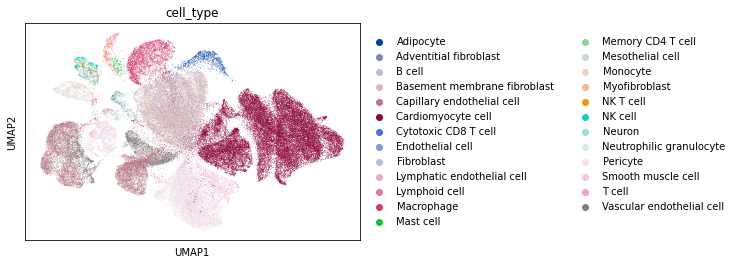

In [296]:
sc.pl.embedding(adata, basis='umap', color="cell_type")

In [297]:
le = LabelEncoder()
label_batch =le.fit_transform(adata.obs["Ref"])

In [298]:
# ARI & NMI
ARI_list = []
NMI_list = []
for reso in [0.1*x for  x in range(1,21)]:
    sc.tl.leiden(adata,resolution=reso)
    ARI_list.append(adjusted_rand_score(adata.obs["cell_type"],adata.obs["leiden"]))
    NMI_list.append(normalized_mutual_info_score(adata.obs["cell_type"],adata.obs["leiden"]))

In [299]:
# ASW_C
ASW_SC = (silhouette_score(adata.obsm["X_pca"],adata.obs["cell_type"])+1)/2
ASW_MC = (silhouette_score(adata.obsm["X_pca"],adata.obs["MCT"])+1)/2

# ASW_B
ASW_B = 0
ct_list = pd.unique(adata.obs["cell_type"])
ss_list = silhouette_samples(adata.obsm["X_pca"], adata.obs["Ref"])

for i in range(len(pd.unique(adata.obs["cell_type"]))):
    ct = ct_list[i]
    C = sum(adata.obs["cell_type"]== ct)
    ASW_B = ASW_B + sum(1-abs(ss_list[adata.obs["cell_type"]== ct]))/C
    
ASW_B = ASW_B/len(ct_list)

In [301]:
# GC 
GC = 0
connectivity_graph =  pd.DataFrame(adata.obsp["connectivities"].todense())
for ct in ct_list:
    sub_graph = connectivity_graph.loc[adata.obs["cell_type"].values== ct,adata.obs["cell_type"].values== ct]

    G = nx.Graph()
    G.add_nodes_from(sub_graph.index.tolist())

    x_list = sub_graph.index.values[np.where(sub_graph>0)[0]]
    y_list = sub_graph.index.values[np.where(sub_graph>0)[1]]
    value_list = sub_graph.values[sub_graph.values>0]

    G.add_weighted_edges_from([(x_list[i],y_list[i],value_list[i]) for i in range(len(value_list))])
    LCC = len(sorted(nx.connected_components(G))[0])
    
    GC += LCC/sub_graph.shape[0]
GC = GC/len(ct_list)

In [302]:
df_assess.loc["trvae",:] = [GC, ASW_B, max(ARI_list), max(NMI_list), ASW_MC, ASW_SC]

In [303]:
df_assess.to_csv("integration_assessment.csv")

# R_MNN

In [9]:
adata = sc.read_h5ad('/data1/chenyx/processed.mnn.h5ad')

In [15]:
adata

AnnData object with n_obs × n_vars = 99567 × 2000
    obs: 'cell_ID', 'donor_ID', 'donor_gender', 'donor_age', 'original_name', 'region', 'subregion', 'seq_tech', 'cell_type', 'seurat_cluster', 'ethnicity', 'Ref', 'MCT', 'PC_1', 'PC_2', 'TSNE_1', 'TSNE_2', 'UMAP_1', 'UMAP_2', 'nFeaturess_RNA', 'nCount_RNA', 'nFeature_RNA'
    var: 'name'
    uns: 'cell_type_colors'
    obsm: 'X_mnn', 'X_umap'

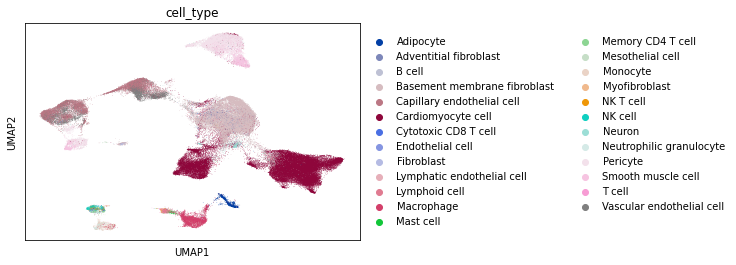

In [13]:
sc.pl.embedding(adata, basis='umap', color="cell_type")

In [18]:
sc.pp.neighbors(adata, use_rep = "X_mnn")

2022-09-20 15:17:34.434683: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [19]:
# ARI & NMI
ARI_list = []
NMI_list = []
for reso in [0.1*x for  x in range(1,21)]:
    sc.tl.leiden(adata,resolution=reso,)
    ARI_list.append(adjusted_rand_score(adata.obs["cell_type"],adata.obs["leiden"]))
    NMI_list.append(normalized_mutual_info_score(adata.obs["cell_type"],adata.obs["leiden"]))

In [20]:
# ASW_C
ASW_SC = (silhouette_score(adata.obsm["X_mnn"],adata.obs["cell_type"])+1)/2
ASW_MC = (silhouette_score(adata.obsm["X_mnn"],adata.obs["MCT"])+1)/2

# ASW_B
ASW_B = 0
ct_list = pd.unique(adata.obs["cell_type"])
ss_list = silhouette_samples(adata.obsm["X_mnn"], adata.obs["Ref"])

for i in range(len(pd.unique(adata.obs["cell_type"]))):
    ct = ct_list[i]
    C = sum(adata.obs["cell_type"]== ct)
    ASW_B = ASW_B + sum(1-abs(ss_list[adata.obs["cell_type"]== ct]))/C
    
ASW_B = ASW_B/len(ct_list)

In [22]:
le = LabelEncoder()
label_batch =le.fit_transform(adata.obs["Ref"])

In [24]:
# GC 
GC = 0
connectivity_graph =  pd.DataFrame(adata.obsp["connectivities"].todense())
for ct in ct_list:
    sub_graph = connectivity_graph.loc[adata.obs["cell_type"].values== ct,adata.obs["cell_type"].values== ct]

    G = nx.Graph()
    G.add_nodes_from(sub_graph.index.tolist())

    x_list = sub_graph.index.values[np.where(sub_graph>0)[0]]
    y_list = sub_graph.index.values[np.where(sub_graph>0)[1]]
    value_list = sub_graph.values[sub_graph.values>0]

    G.add_weighted_edges_from([(x_list[i],y_list[i],value_list[i]) for i in range(len(value_list))])
    LCC = len(sorted(nx.connected_components(G))[0])
    
    GC += LCC/sub_graph.shape[0]
GC = GC/len(ct_list)

In [25]:
df_assess.loc["mnn",:] = [GC, ASW_B, max(ARI_list), max(NMI_list), ASW_MC, ASW_SC]

# R_harmony

In [26]:
adata = sc.read_h5ad('/data1/chenyx/processed.harmony.h5ad')

In [27]:
adata

AnnData object with n_obs × n_vars = 99567 × 2000
    obs: 'cell_ID', 'donor_ID', 'donor_gender', 'donor_age', 'original_name', 'region', 'subregion', 'seq_tech', 'cell_type', 'seurat_cluster', 'ethnicity', 'Ref', 'MCT', 'PC_1', 'PC_2', 'TSNE_1', 'TSNE_2', 'UMAP_1', 'UMAP_2', 'nFeaturess_RNA'
    var: 'name', 'n_cells', 'mvp.mean', 'mvp.dispersion', 'mvp.dispersion.scaled', 'highly.variable_nbatches', 'highly.variable_intersection', 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized'
    obsm: 'X_harmony', 'X_pca', 'X_tsne', 'X_umap'

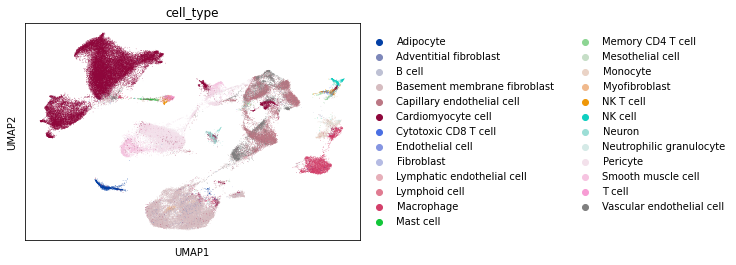

In [28]:
sc.pl.embedding(adata, basis='umap', color="cell_type")

In [29]:
sc.pp.neighbors(adata, use_rep = "X_harmony")

In [30]:
# ARI & NMI
ARI_list = []
NMI_list = []
for reso in [0.1*x for  x in range(1,21)]:
    sc.tl.leiden(adata,resolution=reso,)
    ARI_list.append(adjusted_rand_score(adata.obs["cell_type"],adata.obs["leiden"]))
    NMI_list.append(normalized_mutual_info_score(adata.obs["cell_type"],adata.obs["leiden"]))

In [31]:
# ASW_C
ASW_SC = (silhouette_score(adata.obsm["X_harmony"],adata.obs["cell_type"])+1)/2
ASW_MC = (silhouette_score(adata.obsm["X_harmony"],adata.obs["MCT"])+1)/2

# ASW_B
ASW_B = 0
ct_list = pd.unique(adata.obs["cell_type"])
ss_list = silhouette_samples(adata.obsm["X_harmony"], adata.obs["Ref"])

for i in range(len(pd.unique(adata.obs["cell_type"]))):
    ct = ct_list[i]
    C = sum(adata.obs["cell_type"]== ct)
    ASW_B = ASW_B + sum(1-abs(ss_list[adata.obs["cell_type"]== ct]))/C
    
ASW_B = ASW_B/len(ct_list)

In [33]:
# GC 
GC = 0
connectivity_graph =  pd.DataFrame(adata.obsp["connectivities"].todense())
for ct in ct_list:
    sub_graph = connectivity_graph.loc[adata.obs["cell_type"].values== ct,adata.obs["cell_type"].values== ct]

    G = nx.Graph()
    G.add_nodes_from(sub_graph.index.tolist())

    x_list = sub_graph.index.values[np.where(sub_graph>0)[0]]
    y_list = sub_graph.index.values[np.where(sub_graph>0)[1]]
    value_list = sub_graph.values[sub_graph.values>0]

    G.add_weighted_edges_from([(x_list[i],y_list[i],value_list[i]) for i in range(len(value_list))])
    LCC = len(sorted(nx.connected_components(G))[0])
    
    GC += LCC/sub_graph.shape[0]
GC = GC/len(ct_list)

In [34]:
df_assess.loc["harmony",:] = [GC, ASW_B, max(ARI_list), max(NMI_list), ASW_MC, ASW_SC]

# R_Seurat

In [53]:
adata = sc.read_h5ad('/data1/chenyx/processed.seurat.h5ad')

In [54]:
adata

AnnData object with n_obs × n_vars = 99567 × 2000
    obs: 'cell_ID', 'donor_ID', 'donor_gender', 'donor_age', 'original_name', 'region', 'subregion', 'seq_tech', 'cell_type', 'seurat_cluster', 'ethnicity', 'Ref', 'MCT', 'PC_1', 'PC_2', 'TSNE_1', 'TSNE_2', 'UMAP_1', 'UMAP_2', 'nFeaturess_RNA', 'nCount_RNA', 'nFeature_RNA'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

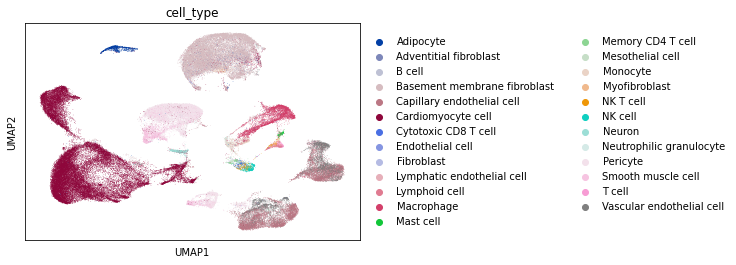

In [55]:
sc.pl.embedding(adata, basis='umap', color="cell_type")

In [56]:
sc.pp.neighbors(adata, use_rep = "X_pca")

In [57]:
# ARI & NMI
ARI_list = []
NMI_list = []
for reso in [0.1*x for  x in range(1,21)]:
    sc.tl.leiden(adata,resolution=reso,)
    ARI_list.append(adjusted_rand_score(adata.obs["cell_type"],adata.obs["leiden"]))
    NMI_list.append(normalized_mutual_info_score(adata.obs["cell_type"],adata.obs["leiden"]))

In [58]:
# ASW_C
ASW_SC = (silhouette_score(adata.obsm["X_pca"],adata.obs["cell_type"])+1)/2
ASW_MC = (silhouette_score(adata.obsm["X_pca"],adata.obs["MCT"])+1)/2

# ASW_B
ASW_B = 0
ct_list = pd.unique(adata.obs["cell_type"])
ss_list = silhouette_samples(adata.obsm["X_pca"], adata.obs["Ref"])

for i in range(len(pd.unique(adata.obs["cell_type"]))):
    ct = ct_list[i]
    C = sum(adata.obs["cell_type"]== ct)
    ASW_B = ASW_B + sum(1-abs(ss_list[adata.obs["cell_type"]== ct]))/C
    
ASW_B = ASW_B/len(ct_list)

In [60]:
# GC 
GC = 0
connectivity_graph =  pd.DataFrame(adata.obsp["connectivities"].todense())
for ct in ct_list:
    sub_graph = connectivity_graph.loc[adata.obs["cell_type"].values== ct,adata.obs["cell_type"].values== ct]

    G = nx.Graph()
    G.add_nodes_from(sub_graph.index.tolist())

    x_list = sub_graph.index.values[np.where(sub_graph>0)[0]]
    y_list = sub_graph.index.values[np.where(sub_graph>0)[1]]
    value_list = sub_graph.values[sub_graph.values>0]

    G.add_weighted_edges_from([(x_list[i],y_list[i],value_list[i]) for i in range(len(value_list))])
    LCC = len(sorted(nx.connected_components(G))[0])
    
    GC += LCC/sub_graph.shape[0]
GC = GC/len(ct_list)

In [61]:
df_assess.loc["Seurat",:] = [GC, ASW_B, max(ARI_list), max(NMI_list), ASW_MC, ASW_SC]

In [63]:
df_assess.to_csv("integration_assessment.csv")

# Visualization

In [64]:
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df_assess = pd.read_csv("integration_assessment.csv")
cols = df_assess.columns.values
cols[0] = "Method"
df_assess.columns = cols

In [71]:
df_assess

,Method,GC,ASW_B,ARI,NMI,ASW_MC,ASW_SC
0,BBKNN,0.776554,0.886832,0.644087,0.684132,0.592394,0.538329
1,combat,0.833755,0.874306,0.397118,0.637672,0.589732,0.533147
2,saucie,0.467420,0.824611,0.196230,0.547781,0.565937,0.503898
3,scanorama,0.757221,0.883703,0.623053,0.685619,0.596385,0.553475
4,scVI,0.905826,0.907496,0.647896,0.686837,0.629467,0.585081
5,scgen,0.938369,0.943715,0.696814,0.771036,0.577054,0.555692
6,trvae,0.832630,0.849832,0.657645,0.706484,0.612421,0.567468
7,mnn,0.795519,0.861348,0.636904,0.689384,0.548582,0.507193
8,harmony,0.838417,0.933482,0.633419,0.668060,0.599091,0.562130
9,Seurat,0.874136,0.895643,0.652381,0.704458,0.599919,0.565331


In [ ]:
df_assess.to_csv("integration_assessment.csv")

In [67]:
df_plot = df_assess.melt(id_vars="Method")
df_plot["group"]= "Bio conservation"
df_plot["group"][df_plot.variable == "GC"] = "Batch correction"
df_plot["group"][df_plot.variable == "ASW_B"] = "Batch correction"

/tmp/ipykernel_75954/1726296841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["group"][df_plot.variable == "GC"] = "Batch correction"
/tmp/ipykernel_75954/1726296841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["group"][df_plot.variable == "ASW_B"] = "Batch correction"


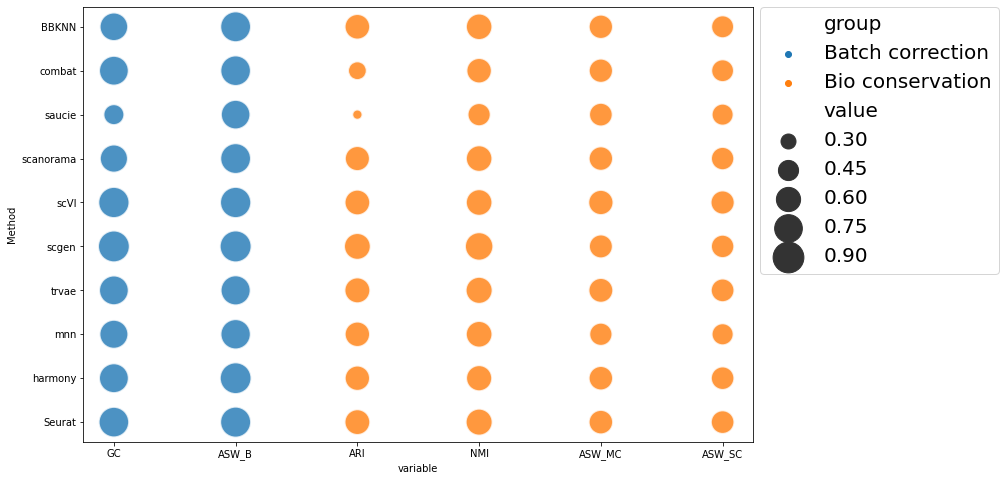

In [76]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.scatterplot(data=df_plot, x="variable", y="Method", size="value", hue="group", sizes=(100, 1000),alpha=0.8,size_order=True,legend="auto")
plt.legend(bbox_to_anchor=(1.01,1),loc=0,borderaxespad=0,prop={'size':20})